<h1 align="center"><span style="color: seagreen">Coder Mê Tài Chính</span></h1>

---
#### <strong>Evangelist</strong>: Lê Minh Đạt

<h1 align="center"><b><span style="color: firebrick">"Cào" dữ liệu BCTC từ cafef.vn bằng thư viện SELENIUM</span></b></h1>

<p>
    <h3>Mục tiêu cần đạt được: </h3>
    Mã chứng khoán: <b>FPT</b> <br>
    Năm: <b>2022</b><br>
    Số lượng năm: <b>5</b><br>
    Kết quả: <b>3 loại BCTC được lưu thành 3 file excel: FPT_BS.xlsx, FPT_IS.xlsx, FPT_CF.xlsx</b>
</p>

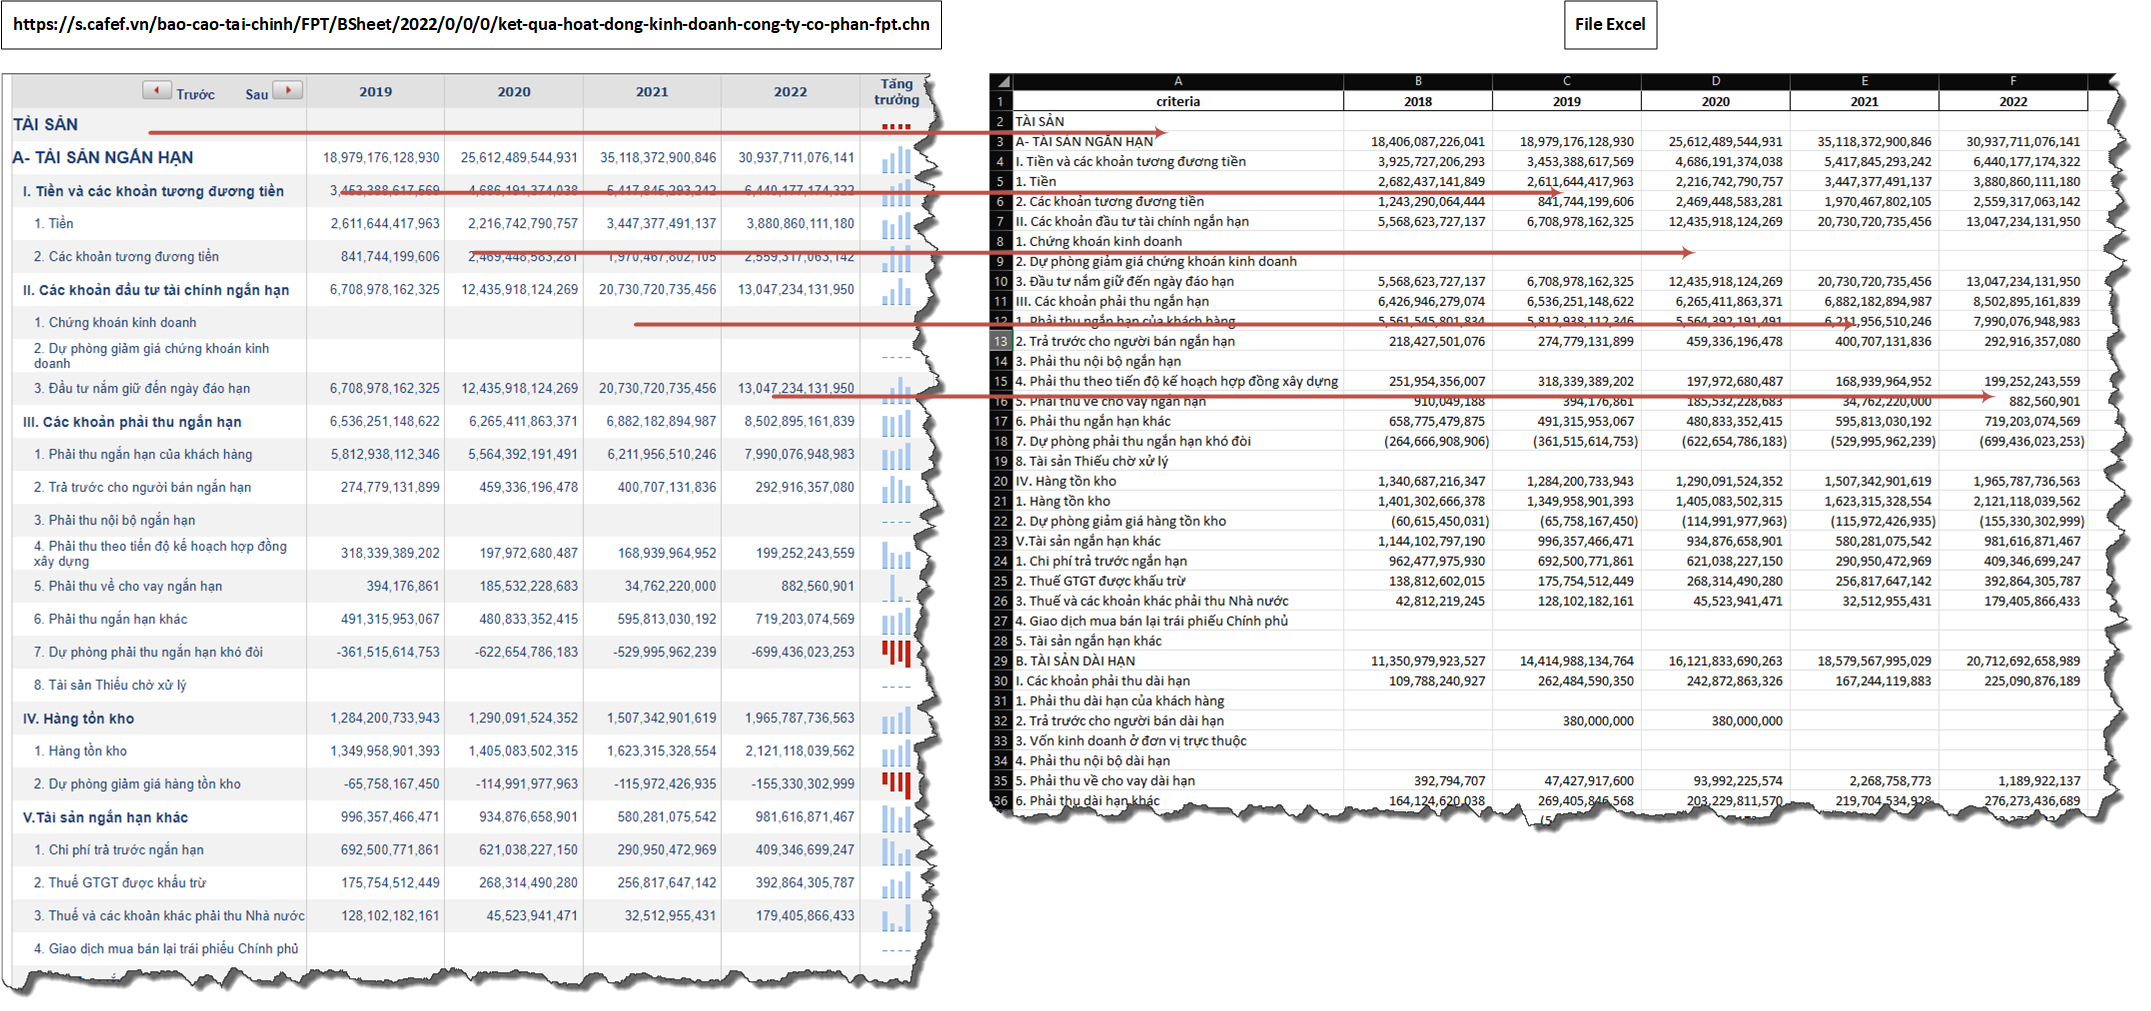

## <span style="color: blue">1. Cài đặt thư viện cần thiết</span>

**pip install selenium**

**pip install webdriver_manager**

**pip install pandas**

**pip install xlsxwriter**

In [40]:
from selenium import webdriver

from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.firefox.service import Service as FirefoxService
from webdriver_manager.firefox import GeckoDriverManager

from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.common.by import By
import pandas as pd

import os

## <span style="color: blue">2. Load web driver</span>

Demo sử dụng Chrome và Firefox

### <span style="color: blue">2.1. Load driver thủ công</span>

**Link download:**

- Chrome: https://chromedriver.chromium.org/downloads

- Firefox: https://github.com/mozilla/geckodriver/releases

In [2]:
# Chrome C:\browser_drivers\chromedriver\chromedriver.exe
service = ChromeService(executable_path=r"C:\browser_drivers\chromedriver\chromedriver.exe")
driver_manual = webdriver.Chrome(service=service)
driver_manual.get("https://vnexpress.net")

In [3]:
# Firefox C:\browser_drivers\geckodriver\geckodriver.exe
service = FirefoxService(executable_path=r"C:\browser_drivers\geckodriver\geckodriver.exe")
driver_manual = webdriver.Firefox(service=service)
driver_manual.get("https://thanhnien.vn")

### <span style="color: blue">2.2. Load driver bằng Driver Manager</span>

In [7]:
# Chrome
service = ChromeService(ChromeDriverManager().install())
chrome_options = ChromeOptions()
chrome_options.add_argument("--headless=new")
driver_auto = webdriver.Chrome(service=service, options=chrome_options)
print(driver_auto.service.path)
# driver_auto.get("https://vnexpress.net")

C:\Users\Vincent\.wdm\drivers\chromedriver\win32\111.0.5563\chromedriver.exe


In [6]:
# Firefox
service = FirefoxService(GeckoDriverManager().install())
driver_auto = webdriver.Firefox(service=service)
print(driver_auto.service.path)
# driver_auto.get("https://vnexpress.net")

[WDM] - Downloading: 18.0kB [00:00, 18.4MB/s]                                                             
[WDM] - Downloading: 18.0kB [00:00, 18.4MB/s]                                                             
[WDM] - Downloading: 100%|███████████████████████████████████████████| 1.59M/1.59M [00:00<00:00, 7.33MB/s]


C:\Users\Vincent\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe


## <span style="color: blue">3. Cào dữ liệu</span>

https://s.cafef.vn/bao-cao-tai-chinh/FPT/BSheet/2022/0/0/0/bao-cao-tai-chinh-cong-ty.chn

https://s.cafef.vn/bao-cao-tai-chinh/FPT/IncSta/2022/0/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty.chn

https://s.cafef.vn/bao-cao-tai-chinh/FPT/CashFlow/2022/0/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty.chn

### <span style="color: blue">Define các functions</span>

In [37]:
def get_elements_value(items, convert_numeric=True):
    _ls = []
    if convert_numeric == False:
        for x in items:
            _ls.append(x.text)
    else:
        for x in items:
            num = x.text.strip().replace(',', '')
            if num.isnumeric():
                _ls.append(int(num))
            else:
                _ls.append(num)
    return _ls

def year_col_process(driver, col):
    x_path = f"//*[@id='tableContent']/tbody/tr/td[{col}]"
    rows = driver.find_elements(By.XPATH, x_path)
    return rows

def get_report_url(ticker, year, report_type):
    if report_type.upper() == 'BS':
        return f"https://s.cafef.vn/bao-cao-tai-chinh/{ticker}/BSheet/{year}/0/0/0/bao-cao-tai-chinh-cong-ty.chn"
    if report_type.upper() == 'IS':
        return f"https://s.cafef.vn/bao-cao-tai-chinh/{ticker}/IncSta/{year}/0/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty.chn"
    if report_type.upper() == 'CF':
        return f"https://s.cafef.vn/bao-cao-tai-chinh/{ticker}/CashFlow/{year}/0/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty.chn"
    
    return ""
    
def get_excel_data(driver, ticker, from_year, to_year, report_type):
    year = to_year    
    data = {}
    criteria_names = {}
    runable = True
    while(runable):
        url = get_report_url(ticker, year, report_type)
        print(url)
        driver.get(url)
        driver.implicitly_wait(5)


        if 'criteria' not in criteria_names:
            name_elements = year_col_process(driver, 1)
            criteria_names['criteria'] = get_elements_value(name_elements, False)


        year_elements = driver.find_elements(By.XPATH, "//*[@id='tblGridData']/tbody/tr/td")
        index_cols = {}
        i = 1
        for item in year_elements:
            str_item = item.text.strip()
            if str_item.isnumeric():
                index_cols[str_item] = i
            i += 1

        index_cols = dict(sorted(index_cols.items(), reverse=True))

        y = 0
        for key in index_cols:
            col = index_cols[key]
            items = year_col_process(driver, col)
            data[key] = get_elements_value(items)
            print(key)

            y = int(key)
            if y == from_year:
                runable = False
                break

        if runable == True:
            year = y - 1


    data = dict(sorted(data.items())) # Short dict
    data = criteria_names | data # Merge two dicts into one
    df = pd.DataFrame(data)

    save_as = f"{ticker}_{report_type}.xlsx"
    writer = pd.ExcelWriter(save_as,
                           engine='xlsxwriter',
                           engine_kwargs={'options': {'strings_to_numbers': True}})
    df.to_excel(writer, sheet_name=report_type, index=False)
    writer.close()
    
    return 1

### <span style="color: blue">Code thôi nào!</span>

In [38]:
TICKER = 'FPT'
TO_YEAR = 2022
LOOK_BACK = 5
FROM_YEAR = TO_YEAR - LOOK_BACK + 1

report_types = ['BS', 'IS', 'CF']
for report in report_types:
    get_excel_data(driver_auto, TICKER, FROM_YEAR, TO_YEAR, report)

driver_auto.quit()
os.startfile(os.getcwd())

https://s.cafef.vn/bao-cao-tai-chinh/FPT/BSheet/2022/0/0/0/bao-cao-tai-chinh-cong-ty.chn
2022
2021
2020
2019
https://s.cafef.vn/bao-cao-tai-chinh/FPT/BSheet/2018/0/0/0/bao-cao-tai-chinh-cong-ty.chn
2018
https://s.cafef.vn/bao-cao-tai-chinh/FPT/IncSta/2022/0/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty.chn
2022
2021
2020
2019
https://s.cafef.vn/bao-cao-tai-chinh/FPT/IncSta/2018/0/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty.chn
2018
https://s.cafef.vn/bao-cao-tai-chinh/FPT/CashFlow/2022/0/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty.chn
2022
2021
2020
2019
https://s.cafef.vn/bao-cao-tai-chinh/FPT/CashFlow/2018/0/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty.chn
2018
